In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss

In [9]:
data = pd.read_csv('data/Train.csv')
# test_data = pd.read_csv('Test.csv')
data.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0


0    325156
1     74844
Name: CHURN, dtype: int64


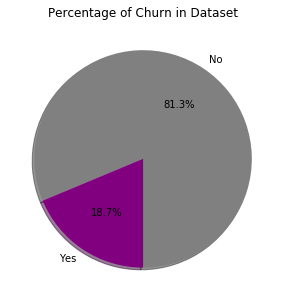

In [10]:
# Data to plot
print(data['CHURN'].value_counts())
sizes = data['CHURN'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
labels = ['No','Yes']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

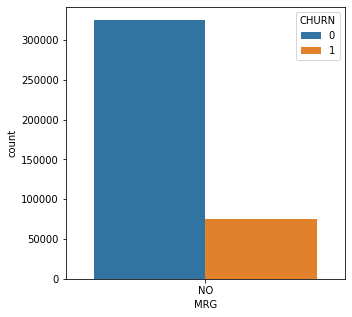

In [11]:
#Visualize the churn count for MRG
sns.countplot(x='MRG', hue='CHURN',data = data)

C:\Users\winner\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\winner\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


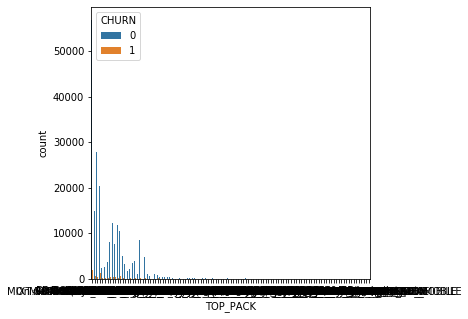

In [12]:
#Visualize the churn count for TOP_PACK
sns.countplot(x='TOP_PACK', hue='CHURN',data = data)

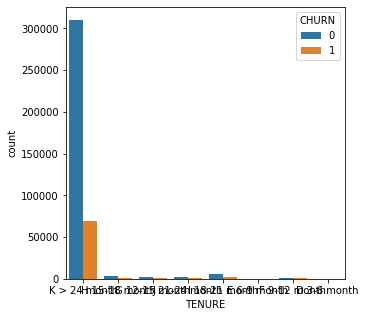

In [13]:
#Visualize the churn count for TENURE
sns.countplot(x='TENURE', hue='CHURN',data = data)

In [14]:
data['REGION'].mode()

0    DAKAR
dtype: object

In [16]:
# test_data_country_list = test_data['REGION'].unique()
# test_data_pack_list = test_data['TOP_PACK'].unique()

## work for training data
# data['user_id_num'] = [float(x) for x in range(len(data))]
# X_copy = pd.DataFrame.copy(data)
# data = data.drop(labels = ['user_id','TENURE','REGION','TOP_PACK','MRG'],axis=1)
data = data.drop(labels = ['user_id','MRG','TOP_PACK'],axis=1)
# data['REGION'] = data['REGION'].apply(lambda x: x if x in test_data_country_list else 'DAKAR')
# data = data[~data.REGION.str.contains('MISSING')]
# data['TOP_PACK'] = data['TOP_PACK'].apply(lambda x: x if x in test_data_pack_list else 'MISSING')
# data = data[~data.TOP_PACK.str.contains('MISSING')]


In [18]:
print(list(data['REGION'].unique()))
# print(list(test_data['REGION'].unique()))

['SAINT-LOUIS', nan, 'TAMBACOUNDA', 'FATICK', 'THIES', 'LOUGA', 'DAKAR', 'KAFFRINE', 'DIOURBEL', 'KOLDA', 'MATAM', 'SEDHIOU', 'KAOLACK', 'ZIGUINCHOR', 'KEDOUGOU']


In [ ]:
## ============================================
## Work for testing data
# data_pack_list = data['TOP_PACK'].unique()

# test_data['user_id_num'] = [float(x) for x in range(len(test_data))]

# test_data = test_data.drop(labels = ['user_id','TENURE','REGION','TOP_PACK','MRG'],axis=1)
# test_data = test_data.drop(labels = ['user_id','MRG','TOP_PACK'],axis=1)
# test_data['REGION'] = test_data['REGION'].apply(lambda x: 'DAKAR' if str(x) == str('nan')  else str(x))
# test_data = test_data[~test_data.REGION.str.contains('MISSING')]
# test_data['TOP_PACK'] = test_data['TOP_PACK'].apply(lambda x: x if x in test_data_pack_list else 'MISSING')
# test_data = test_data[~test_data.TOP_PACK.str.contains('MISSING')]

In [ ]:
print(len(test_data['TOP_PACK'].unique()),len(data['TOP_PACK'].unique()))

In [ ]:
test_data

In [ ]:
data

In [20]:
# work for training data
# lets check if our data have any null values
print(data.isna().sum())

## ============================================
## Work for testing data

#lets check if our data have any null values
# print(test_data.isna().sum())

REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
REGULARITY             0
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64


In [21]:
## work for training data

data = data.fillna(-99999)
# data = data.dropna()

## ============================================
## Work for testing data

# test_data = test_data.fillna(-99999)
# test_data = test_data.dropna()

In [ ]:
print(len(test_data['TOP_PACK'].unique()))

In [ ]:
print(len(data['TOP_PACK'].unique()))

In [22]:
## work for training data

#Standardizing/scaling the features
X = data.drop(['CHURN'],axis=1)
X = pd.get_dummies(X)
# X_columns = X.columns.values.tolist()
scalery = StandardScaler()
X = scalery.fit_transform(X)
y = data['CHURN']
print(X.shape,y.shape)

## ============================================


(400000, 36) (400000,)


In [ ]:
## Work for testing data

#Standardizing/scaling the features
X1 = pd.DataFrame.copy(test_data)
# X1_ids = pd.DataFrame.copy(test_data['user_id'])
# test_data = test_data.drop(labels = ['user_id','MRG','TOP_PACK'],axis=1)
X1 = pd.get_dummies(test_data)
X_columns = X1.columns.values.tolist()
scalery = StandardScaler()
X1 = scalery.fit_transform(X1)
print(X.shape,X1.shape,X1_ids)

In [23]:
## work for training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## ============================================
## Work for testing data

# X_train, X_test, y_train, y_test = train_test_split(
#     X,y, test_size=0.30, random_state=101)

In [24]:
## work for training data

# clf = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features=30,min_samples_leaf=2)
# clf = LogisticRegression(C=36,class_weight=36)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))
# print(f'The accurancy score is:{accuracy_score(pred,y_test)*100}%')
# print("Loss Funtion: {}".format(log_loss(y_test,pred)))


Training set score: 0.879
Test set score: 0.878


In [ ]:
## ============================================
## Work for testing data
pred = clf.predict(X1)

In [ ]:
## work for training data

# weights = pd.Series(clf.coef_[0],index=X_columns)
# weights.sort_values(ascending = False)

## ============================================
## Work for testing data
# To get the weights of all the variables

feat_importances = pd.Series(clf.feature_importances_, index=X_columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [ ]:
## work for training data
## original_x = scalery.inverse_transform(X_test)
# original_x = pd.DataFrame(data=original_x,columns=X_columns)
# original_x['pred'] = pred
# original_x = pd.DataFrame(data = list(zip(original_x['user_id_num'],original_x['pred'])), 
#                          columns = ['user_id_num', 'pred'])

## ============================================
## Work for testing data

# original_x = scalery.inverse_transform(X_test)
original_x = pd.DataFrame(data=X1,columns=X_columns)
original_x['pred'] = pred
original_x = pd.DataFrame(data = list(zip(original_x['user_id_num'],original_x['pred'])),
                          columns = ['user_id_num', 'pred'])

In [ ]:
## work for training data
# real_churn = pd.merge(X1, original_x, on='user_id_num', how='left')
# real_churn = pd.DataFrame(data = list(zip(real_churn['user_id'],real_churn['pred']))
#                           , columns = ['user_id', 'pred'])
# real_churn = real_churn.dropna()
# real_churn

## ============================================
## Work for testing data
real_churn = pd.merge(X_copy, original_x, on='user_id_num', how='left')
real_churn = pd.DataFrame(data = list(zip(real_churn['user_id'],real_churn['pred']))
                          , columns = ['user_id', 'pred'])
real_churn = real_churn.dropna()
real_churn

In [ ]:
X1 = scalery.inverse_transform(X1)
X1 = pd.DataFrame(data=X1,columns=X_columns)
X1['pred'] = pred
X1['user_id'] = X1_ids
X1 = pd.DataFrame(data = list(zip(X1['pred']))
                          , columns = ['CHURN'], index=X1['user_id'])

In [ ]:
X1.head(5)

In [ ]:
X1.to_csv('prediction.csv')

In [ ]:
# Loading the data dictionary to understand the meaning of the variable relatively to the business
variable_definition = pd.read_csv('VariableDefinitions.csv')
variable_definition